In [1]:
!pip install pandas matplotlib


Looking in indexes: https://nexus.insee.fr/repository/pypi-proxy/simple


Statistiques des fichiers/scripts ciblés:
Script
               3355
index.php      1735
main.php       1691
help.php       1085
script         1046
top.php         888
a               351
FILE            240
texed.php       166
phprint.php     159
login.php       149
cmd.exe         143
passwd          131
search.jsp      126
div             123
SCRIPT          122
server.php      122
config.php      113
awstats.pl      111
admin.php       110
Name: count, dtype: int64


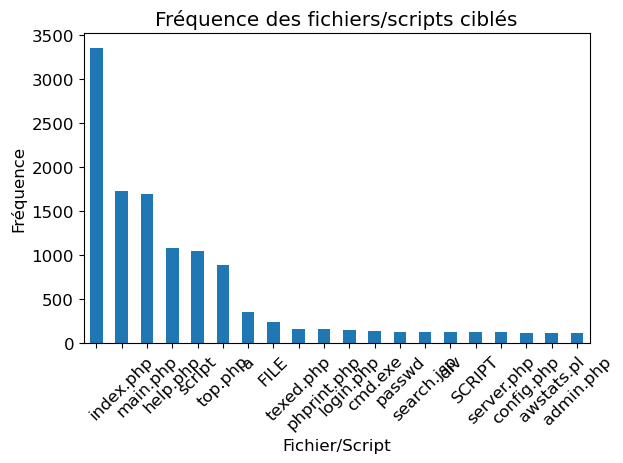

Statistiques des vulnérabilités exploitées:
Vulnerability
<script>           6538
../                3124
x00                1423
union select        522
..\                 427
%00                 121
document.cookie      72
Name: count, dtype: int64


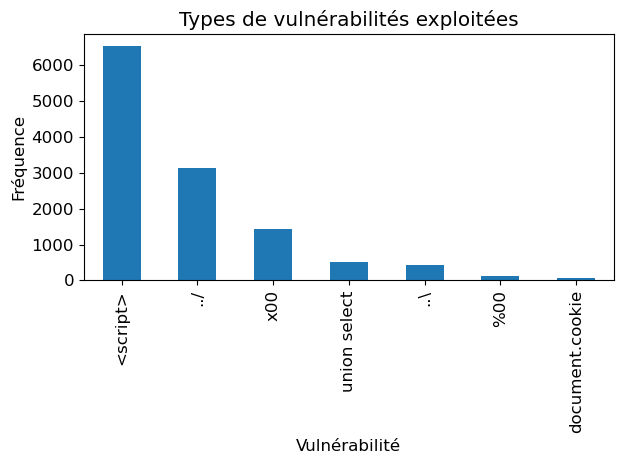

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurer Matplotlib pour mieux gérer les problèmes de police
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

# Lire chaque ligne du fichier directement en Python
path = 'badqueries.txt'
with open(path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Créer un DataFrame à partir de la liste des lignes
data = pd.DataFrame(lines, columns=['Request'])

# Fonction pour extraire les éléments clés des requêtes
def extract_features(request):
    parts = request.split('?')[0]
    # Nettoyage des entrées pour retirer les retours à la ligne et autres caractères non désirés
    cleaned_part = parts.strip().split('/')[-1]
    return cleaned_part.replace('\n', '').replace('\r', '')

# Appliquer la fonction pour extraire les scripts ou fichiers
data['Script'] = data['Request'].apply(extract_features)

# Nettoyage supplémentaire pour éviter les entrées mal formées
data['Script'] = data['Script'].str.replace(r'[^a-zA-Z0-9._]', '', regex=True)

# Statistiques descriptives
print("Statistiques des fichiers/scripts ciblés:")
print(data['Script'].value_counts().head(20))  # Afficher uniquement les 20 premiers pour simplifier

# Visualisation des données (adaptée pour éviter les erreurs)
top_scripts = data['Script'].value_counts().head(20)
fig, ax = plt.subplots()
top_scripts.plot(kind='bar', ax=ax)
ax.set_title('Fréquence des fichiers/scripts ciblés')
ax.set_xlabel('Fichier/Script')
ax.set_ylabel('Fréquence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploration supplémentaire pour les types de vulnérabilités
data['Vulnerability'] = data['Request'].str.extract(r'(\.\./|\.\.\\|<script>|%00|x00|union select|document\.cookie)')
print("Statistiques des vulnérabilités exploitées:")
print(data['Vulnerability'].value_counts())

# Visualisation des vulnérabilités
vuln_counts = data['Vulnerability'].value_counts()
fig, ax = plt.subplots()
vuln_counts.plot(kind='bar', ax=ax)
ax.set_title('Types de vulnérabilités exploitées')
ax.set_xlabel('Vulnérabilité')
ax.set_ylabel('Fréquence')
plt.tight_layout()
plt.show()
